# [Fourier Transforms With scipy.fft: Python Signal Processing (Real Python)](https://realpython.com/python-scipy-fft/)

- Author: Israel Oliveira [\[e-mail\]](mailto:'Israel%20Oliveira%20'<prof.israel@gmail.com>)

In [3]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [7]:
import matplotlib.pyplot as plt
# Algumas configurações para o matplotlib.
%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(12, 8)

#pd.set_option("max_columns", None)
#pd.set_option("max_rows", None)

In [8]:
# Run this cell before close.
%watermark -d --iversion -b -r -g -m -v
!cat /proc/cpuinfo |grep 'model name'|head -n 1 |sed -e 's/model\ name/CPU/'
!free -h |cut -d'i' -f1  |grep -v total

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.19.0

Compiler    : GCC 8.3.0
OS          : Linux
Release     : 5.4.39-linuxkit
Machine     : x86_64
Processor   : 
CPU cores   : 16
Architecture: 64bit

Git hash: 08dc8536b8db253db6d4aa58cb7f4f2c975ea16d

Git repo: https://github.com/ysraell/examples.git

Git branch: master

numpy     : 1.19.4
pandas    : 1.1.5
matplotlib: 3.3.3

CPU	: Intel(R) Core(TM) i9-9880H CPU @ 2.30GHz
Mem:           15G
Swap:         4.0G


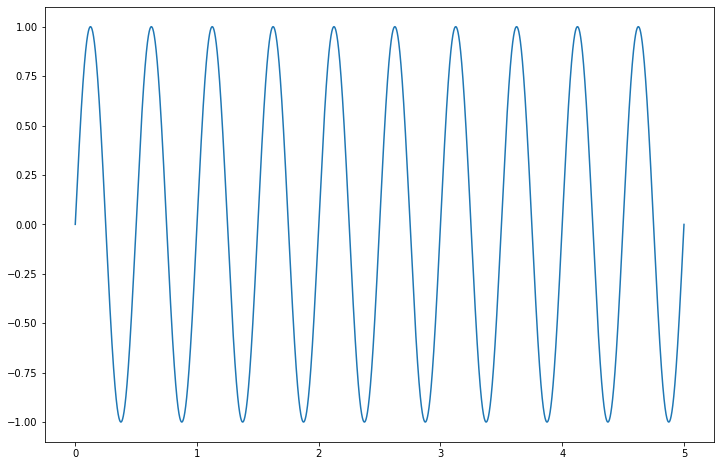

In [9]:
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

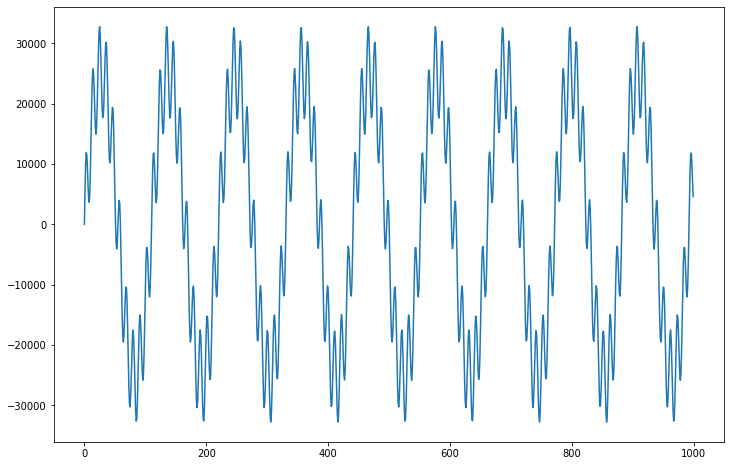

In [10]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

In [11]:
from scipy.io.wavfile import write

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
write("mysinewave.wav", SAMPLE_RATE, normalized_tone)

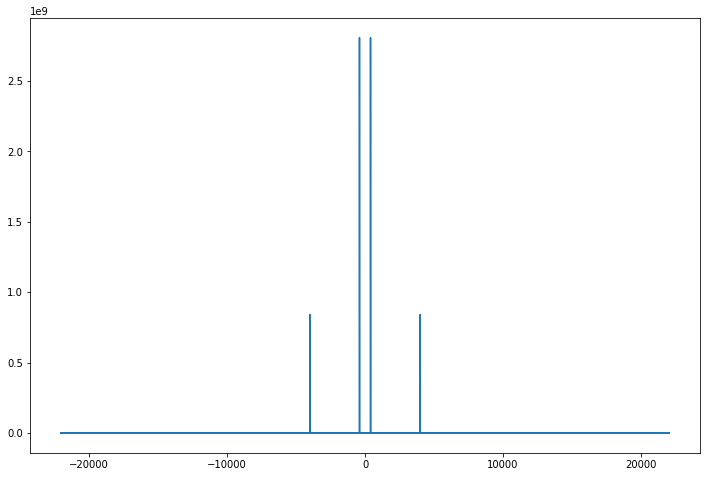

In [12]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

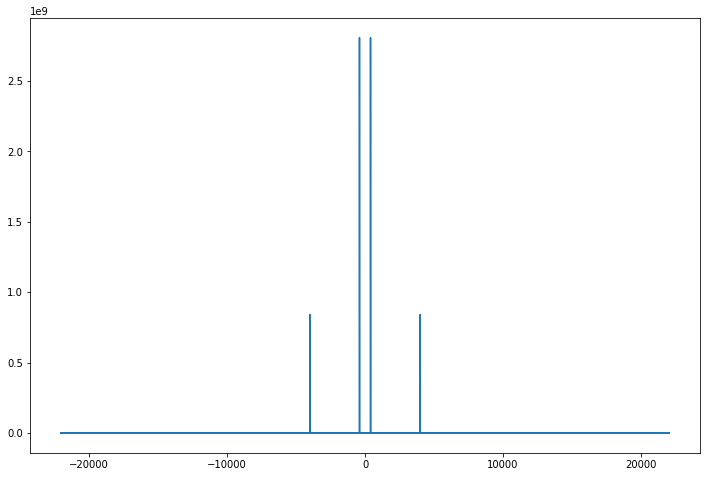

In [13]:
yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)
plt.plot(xf, np.abs(yf))
plt.show()

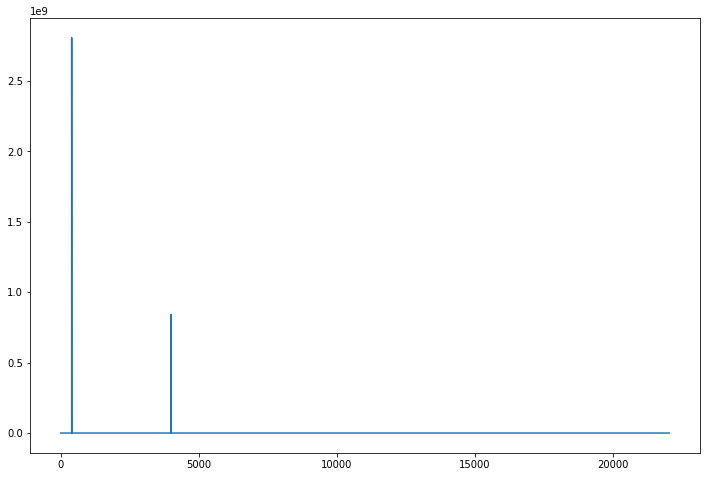

In [15]:
yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)
from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

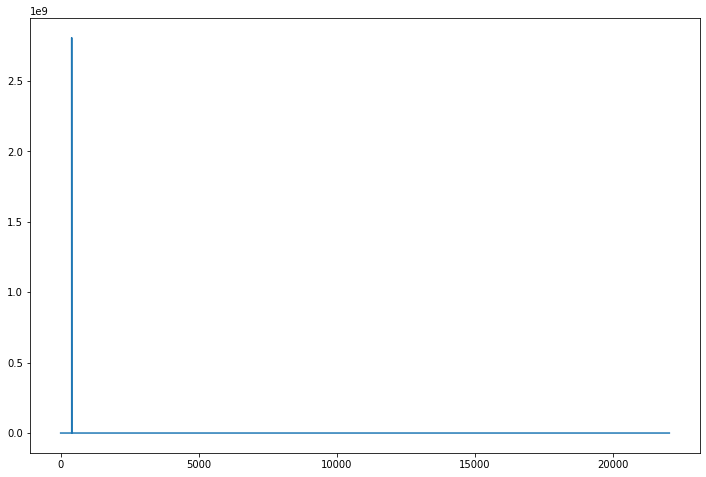

In [16]:
# The maximum frequency is half the sample rate
points_per_freq = len(xf) / (SAMPLE_RATE / 2)

# Our target frequency is 4000 Hz
target_idx = int(points_per_freq * 4000)

yf[target_idx - 1 : target_idx + 2] = 0

plt.plot(xf, np.abs(yf))
plt.show()